In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputRegressor

import pandas as pd


In [1]:
input = pd.read_csv('input.csv')
output = pd.read_csv('output2.csv')

rin = input.transpose()
rout = output.transpose()


NameError: name 'pd' is not defined

In [ ]:
x = rin  # Features
y = rout  # Target variable

x = np.array(rin)
y = np.array(rout)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Standardize the features (important for perceptron)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Shape of X_train:", x_train.shape)  # Should be (n_samples_train, n_features)
print("Shape of y_train:", y_train.shape)  # Should be (n_samples_train, n_outputs)

# Initialize the Perceptron
linear_regression = LinearRegression()
multi_output_regressor = MultiOutputRegressor(linear_regression)


# Train the Perceptron
multi_output_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = multi_output_regressor.predict(x_test)

# Evaluate the model
accuracy = multi_output_regressor.score(x_test, y_test)
print("Model accuracy:", accuracy)


Shape of X_train: (9, 41)
Shape of y_train: (9, 56)
Model accuracy: -8.616879052512425


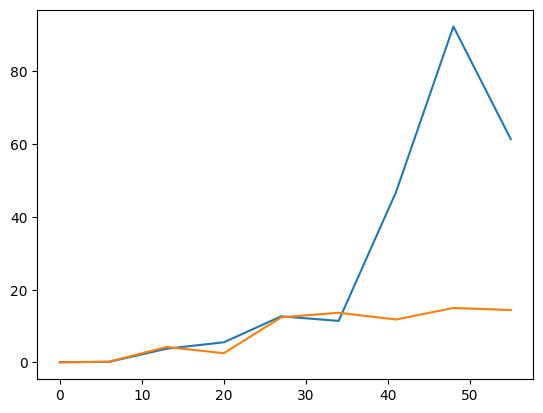

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred[0])
plt.plot(y_test[0])

In [ ]:
def r2_score_multi_output(y_true, y_pred):
    # Convert lists to numpy arrays for easier calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the mean of the true values
    y_mean = np.mean(y_true, axis=0)
    
    # Calculate the total sum of squares (SS_tot)
    ss_tot = np.sum((y_true - y_mean) ** 2, axis=0)
    
    # Calculate the residual sum of squares (SS_res)
    ss_res = np.sum((y_true - y_pred) ** 2, axis=0)
    
    # Calculate the R^2 score for each output
    r2_scores = 1 - (ss_res / ss_tot)
    
    # Return the mean R^2 score across all outputs
    return np.mean(r2_scores)

# Example usage
y_true = [[3, -0.5, 2], [2, 0, 0], [4, 1, 2], [3, 2, 1]]
y_pred = [[2.5, 0.0, 2], [0, 0, 0], [4, 1, 2], [3, 1.5, 1]]

accuracy = r2_score_multi_output(y_true, y_pred)
print(f'Custom R^2 score: {accuracy}')